<a href="https://colab.research.google.com/github/alehunter/CAP4770/blob/main/projects/ImageClassification_AlejandroHunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>IMAGE CLASSIFICATION PROJECT</H1>

This project consists of creating a classifier that will predict the category of an image.
I will be using the CIFAR-10 dataset.
The basic approach for this is to create a neural network that can process 32x32 images and classify them into 10 different classes.
Having done this before it should be fairly straightforward.

# GET THE DATA


Step 1 is downloading the data

In [1]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz

--2022-12-01 15:58:23--  https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.93.142, 52.216.50.88, 52.217.162.0, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.93.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135107811 (129M) [application/x-tar]
Saving to: ‘cifar10.tgz’

cifar10.tgz         100%[===================>] 128.85M  40.9MB/s    in 3.2s    

2022-12-01 15:58:26 (40.9 MB/s) - ‘cifar10.tgz’ saved [135107811/135107811]



In [2]:
!tar -zxvf cifar10.tgz

Streaming output truncated to the last 5000 lines.
cifar10/test/ship/0489.png
cifar10/test/ship/0295.png
cifar10/test/ship/0430.png
cifar10/test/ship/0973.png
cifar10/test/ship/0438.png
cifar10/test/ship/0794.png
cifar10/test/ship/0634.png
cifar10/test/ship/0783.png
cifar10/test/ship/0012.png
cifar10/test/ship/0933.png
cifar10/test/ship/0195.png
cifar10/test/ship/0781.png
cifar10/test/ship/0189.png
cifar10/test/ship/0891.png
cifar10/test/ship/0255.png
cifar10/test/ship/0798.png
cifar10/test/ship/0487.png
cifar10/test/ship/0019.png
cifar10/test/ship/0078.png
cifar10/test/ship/0623.png
cifar10/test/ship/0100.png
cifar10/test/ship/0826.png
cifar10/test/ship/0163.png
cifar10/test/ship/0755.png
cifar10/test/ship/0303.png
cifar10/test/ship/0302.png
cifar10/test/ship/0706.png
cifar10/test/ship/0940.png
cifar10/test/ship/0607.png
cifar10/test/ship/0048.png
cifar10/test/ship/0676.png
cifar10/test/ship/0363.png
cifar10/test/ship/0175.png
cifar10/test/ship/0091.png
cifar10/test/ship/0625.png
cifa

The data is separated into two folders, test and train, each of which has 10 subfolders containing instances of each class.
The directory structure here is mostly usable. All we have left is to create a validation folder with validation images.
Then we will create a data generator for each folder

In [3]:
import os, shutil

In [54]:
validation_dir = "cifar10/validation"
os.mkdir(validation_dir)

In [56]:
imClasses = ['airplane/', 'automobile/', 'bird/', 'cat/', 'deer/', 'dog/', 'frog/', 'horse/', 'ship/', 'truck/']


for imClass in imClasses:
  os.mkdir(os.path.join('cifar10/validation/', imClass))

Lets transfer the first 1000 images of train subfolder into a corresponding validation folder

In [57]:
#iterating over each class
for imClass in imClasses:
  curr_dir = os.path.join('cifar10/train/', imClass)
  dest_dir = os.path.join('cifar10/validation/', imClass)

  for root, dirs, files in os.walk(curr_dir):
    for filename in files[:1000]:
      os.rename( os.path.join(curr_dir, filename), os.path.join(dest_dir, filename))
    

In [101]:
from keras.preprocessing.image import ImageDataGenerator

#rescale images to 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "cifar10/train",
    target_size=(32, 32),
    batch_size=128,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    "cifar10/test",
    target_size=(32, 32),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    "cifar10/validation",
    target_size=(32, 32),
    batch_size=20,
    class_mode='categorical'
)

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


Now we have both the train and test data in a usable format

# CREATE A SIMPLE NETWORK

Now lets design a simple network

In [102]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(32, 32, 3)))
network.add(layers.Dense(512, activation = 'relu', input_shape=(32*32*3, )))
network.add(layers.Dense(256, activation = 'relu'))
network.add(layers.Dense(10, activation = 'softmax', input_shape=()))


In [103]:
network.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_22 (Dense)            (None, 512)               1573376   
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


Compile the network

In [104]:
from keras import optimizers


network.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

Fit the model

In [105]:
history = network.fit(
          train_generator,
          steps_per_epoch=200,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=50)


Epoch 1/30
200/200 [==============================] - 9s 42ms/step - loss: 2.3660 - accuracy: 0.2177 - val_loss: 1.8858 - val_accuracy: 0.3240
Epoch 2/30
200/200 [==============================] - 8s 42ms/step - loss: 1.8974 - accuracy: 0.3156 - val_loss: 1.7686 - val_accuracy: 0.3730
Epoch 3/30
200/200 [==============================] - 8s 42ms/step - loss: 1.8011 - accuracy: 0.3490 - val_loss: 1.7545 - val_accuracy: 0.3750
Epoch 4/30
200/200 [==============================] - 8s 42ms/step - loss: 1.7423 - accuracy: 0.3755 - val_loss: 1.8841 - val_accuracy: 0.3490
Epoch 5/30
200/200 [==============================] - 8s 42ms/step - loss: 1.6988 - accuracy: 0.3975 - val_loss: 1.6572 - val_accuracy: 0.4020
Epoch 6/30
200/200 [==============================] - 8s 42ms/step - loss: 1.6515 - accuracy: 0.4107 - val_loss: 1.7342 - val_accuracy: 0.3780
Epoch 7/30
200/200 [==============================] - 8s 42ms/step - loss: 1.6084 - accuracy: 0.4310 - val_loss: 1.7288 - val_accuracy: 0.3760

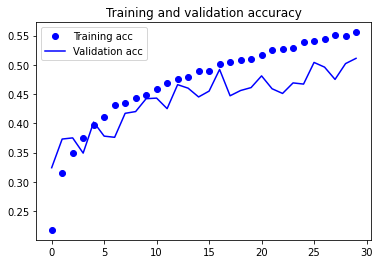

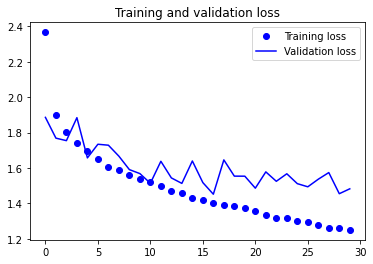

In [106]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The above graph shows training and validation accuracy improving as well as training and validation loss decreasing until it sort of plateaus.
One theory on this is that it might still continue to improve with more epochs.
Lets see if the model generalizes well with the test data.

In [108]:
score = network.evaluate(test_generator)
print("Accuracy: ", score[1])

500/500 [==============================] - 4s 8ms/step - loss: 1.4804 - accuracy: 0.4883
Accuracy:  0.48829999566078186


<h2>THOUGHTS</h2>
At first glance 48% doesn't sound great, but looking at the images and how small they are, even a person might have difficulty determining some. 
I think that more training epochs could yield an improvement.

In [110]:
network = models.Sequential()
network.add(layers.Flatten(input_shape=(32, 32, 3)))
network.add(layers.Dense(512, activation = 'relu', input_shape=(32*32*3, )))
network.add(layers.Dense(256, activation = 'relu'))
network.add(layers.Dense(10, activation = 'softmax', input_shape=()))

network.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [111]:
history = network.fit(
          train_generator,
          steps_per_epoch=200,
          epochs=60,
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/60
200/200 [==============================] - 9s 42ms/step - loss: 2.3359 - accuracy: 0.2182 - val_loss: 1.9130 - val_accuracy: 0.2900
Epoch 2/60
200/200 [==============================] - 8s 42ms/step - loss: 1.8978 - accuracy: 0.3175 - val_loss: 1.8626 - val_accuracy: 0.3350
Epoch 3/60
200/200 [==============================] - 8s 42ms/step - loss: 1.8015 - accuracy: 0.3537 - val_loss: 1.7668 - val_accuracy: 0.3440
Epoch 4/60
200/200 [==============================] - 8s 42ms/step - loss: 1.7429 - accuracy: 0.3757 - val_loss: 1.6727 - val_accuracy: 0.4110
Epoch 5/60
200/200 [==============================] - 8s 42ms/step - loss: 1.6955 - accuracy: 0.3929 - val_loss: 1.7280 - val_accuracy: 0.3920
Epoch 6/60
200/200 [==============================] - 8s 41ms/step - loss: 1.6497 - accuracy: 0.4131 - val_loss: 1.5964 - val_accuracy: 0.4280
Epoch 7/60
200/200 [==============================] - 8s 41ms/step - loss: 1.6118 - accuracy: 0.4239 - val_loss: 1.6390 - val_accuracy: 0.4010

In [112]:
score = network.evaluate(test_generator)
print("Accuracy: ", score[1])

500/500 [==============================] - 4s 7ms/step - loss: 1.6780 - accuracy: 0.4967
Accuracy:  0.4966999888420105


# Improved Network


Lets make a more complicated network setup

In [114]:
convmodel = models.Sequential()
convmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
convmodel.add(layers.MaxPooling2D((2, 2)))
convmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
convmodel.add(layers.MaxPooling2D((2, 2)))
convmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
convmodel.add(layers.MaxPooling2D((2, 2)))
convmodel.add(layers.Flatten())
convmodel.add(layers.Dense(512, activation='relu'))
convmodel.add(layers.Dense(10, activation='softmax'))

In [115]:
convmodel.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [117]:
history = convmodel.fit(
          train_generator,
          steps_per_epoch=200,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/30
200/200 [==============================] - 8s 42ms/step - loss: 1.9040 - accuracy: 0.3062 - val_loss: 1.6084 - val_accuracy: 0.4050
Epoch 2/30
200/200 [==============================] - 8s 42ms/step - loss: 1.5378 - accuracy: 0.4534 - val_loss: 1.4699 - val_accuracy: 0.4680
Epoch 3/30
200/200 [==============================] - 8s 41ms/step - loss: 1.3499 - accuracy: 0.5213 - val_loss: 1.4025 - val_accuracy: 0.5070
Epoch 4/30
200/200 [==============================] - 8s 41ms/step - loss: 1.2291 - accuracy: 0.5629 - val_loss: 1.1155 - val_accuracy: 0.5890
Epoch 5/30
200/200 [==============================] - 8s 41ms/step - loss: 1.1364 - accuracy: 0.5989 - val_loss: 1.1258 - val_accuracy: 0.6070
Epoch 6/30
200/200 [==============================] - 8s 41ms/step - loss: 1.0539 - accuracy: 0.6306 - val_loss: 1.2047 - val_accuracy: 0.5780
Epoch 7/30
200/200 [==============================] - 8s 41ms/step - loss: 0.9819 - accuracy: 0.6572 - val_loss: 0.9467 - val_accuracy: 0.6570

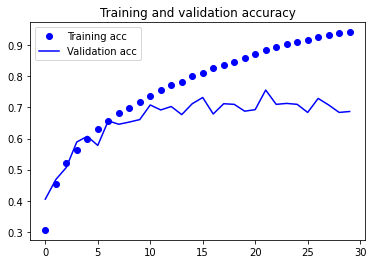

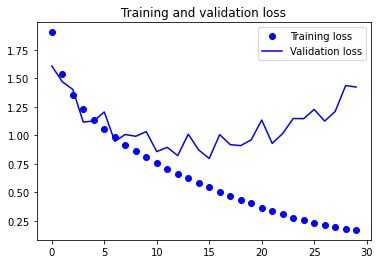

In [118]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After having made a more complex network with alternating convolutional 2d and pooling layers, we achieved a much better result.
However it looks like this model is overfit, possibly due to the change in layers.
Lets see how it does on the test data.

In [119]:
score = convmodel.evaluate(test_generator)
print("Accuracy: ", score[1])

500/500 [==============================] - 4s 8ms/step - loss: 1.3972 - accuracy: 0.6972
Accuracy:  0.6972000002861023


The model improved to almost 70% from 49%.
This represents a 40% improvement which is incredible.

<h2>Thoughts</h2>
Although the model improved an enormous amount, there might still be room for improvement.
Data Augmentation is a method that uses existing images to create "new" instances by flipping them, resizing, etc. This gives us more training data which could help improve our model.
Another option would be to improve the complexity of the model, although this might cause the model to overfit even more